# Predicting defaults on Lending Club database


- Authors: Beltrán Aller López and Miguel López Garralón
- Date: 13/12/2019
- Email: beltran.aller@cunef.edu and m.lopez@cunef.edu
- Institution: CUNEF
- Version: 1.0

Before doing anything, we will import the necessaries libraries.

In [1]:
# Libraries

import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt # plots
import seaborn as sns # plots
from scipy import stats as sts # normality test JB
from sklearn import metrics
import itertools # aplanar arrays
import math
import random
random.seed(1122019)
from sklearn.decomposition import PCA

The following variable indicates the route in which we have our dataset.

In [2]:
data_path = '../data/DE_set.csv'

## 1. READING THE DATA

The dataset is kept into the data directory. In the same folder you can find the data dictionary.

In [3]:
loan = pd.read_csv(data_path)

In [4]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950000 entries, 0 to 949999
Data columns (total 95 columns):
loan_amnt                              950000 non-null float64
int_rate                               950000 non-null float64
installment                            950000 non-null float64
annual_inc                             950000 non-null float64
dti                                    950000 non-null float64
delinq_2yrs                            950000 non-null float64
inq_last_6mths                         950000 non-null float64
mths_since_last_delinq                 950000 non-null float64
mths_since_last_record                 950000 non-null float64
open_acc                               950000 non-null float64
pub_rec                                950000 non-null float64
revol_bal                              950000 non-null float64
revol_util                             950000 non-null float64
total_acc                              950000 non-null float64
recover

In [5]:
loan.head()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,...,purpose_home,purpose_investment,purpose_medical,purpose_other,purpose_purchase,application_type_Individual,application_type_Joint App,target,desc,grade
0,0.662751,1.494076,0.382284,-0.172057,0.158557,0.938666,0.384337,-1.227805,0.397505,1.560443,...,0,0,0,0,0,1,0,0,0,2
1,-1.195200,-0.862249,-1.191234,-0.567631,-1.060041,-0.370282,-0.680940,0.961941,0.397505,-1.243822,...,0,0,0,0,0,1,0,0,0,5
2,-0.492982,-1.133558,-0.464256,-0.201359,-1.149479,-0.370282,-0.680940,0.961941,0.397505,-1.644431,...,0,0,0,0,0,1,0,0,1,6
3,-1.253718,-0.584532,-1.245387,0.025730,-0.124664,-0.370282,0.384337,-0.938593,0.397505,0.959529,...,0,0,0,1,0,1,0,0,0,5
4,-0.229651,2.944616,-0.224740,-0.218896,0.738043,-0.370282,-0.680940,0.961941,-0.769116,-1.043517,...,0,0,0,0,0,1,0,1,0,1


The first thing we have to do is splitting the dataset between numerical and categorical variables.

In [6]:
numericas = loan.select_dtypes(include = [np.float64])

In [7]:
numericas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950000 entries, 0 to 949999
Data columns (total 74 columns):
loan_amnt                         950000 non-null float64
int_rate                          950000 non-null float64
installment                       950000 non-null float64
annual_inc                        950000 non-null float64
dti                               950000 non-null float64
delinq_2yrs                       950000 non-null float64
inq_last_6mths                    950000 non-null float64
mths_since_last_delinq            950000 non-null float64
mths_since_last_record            950000 non-null float64
open_acc                          950000 non-null float64
pub_rec                           950000 non-null float64
revol_bal                         950000 non-null float64
revol_util                        950000 non-null float64
total_acc                         950000 non-null float64
recoveries                        950000 non-null float64
collection_recovery

In [8]:
categoricas = loan.drop(list(numericas.columns), axis = 1)

In [9]:
categoricas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950000 entries, 0 to 949999
Data columns (total 21 columns):
term_ 36 months                        950000 non-null int64
term_ 60 months                        950000 non-null int64
emp_length_6+ years                    950000 non-null int64
emp_length_<= 5 years                  950000 non-null int64
home_ownership_OTHER                   950000 non-null int64
home_ownership_OWN                     950000 non-null int64
home_ownership_RENT                    950000 non-null int64
verification_status_Not Verified       950000 non-null int64
verification_status_Source Verified    950000 non-null int64
verification_status_Verified           950000 non-null int64
purpose_debt_consolidation             950000 non-null int64
purpose_home                           950000 non-null int64
purpose_investment                     950000 non-null int64
purpose_medical                        950000 non-null int64
purpose_other                      

## 2. PCA

We have made a dimensionality reduction analysis with PCA to reduce the number of numerical variables. In the first moment, we have 74 numerical variables, and we want to have less variables. 

In [10]:
pca = PCA()
num_scaled_pca = pca.fit_transform(numericas)

In [11]:
# to select the number of components
explained_variance = pca.explained_variance_ratio_

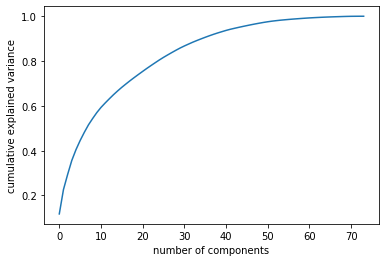

In [12]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [13]:
explained_variance_df = pd.DataFrame(explained_variance, columns=['Percentage of variance explained'])
explained_variance_df.head(20)

,Percentage of variance explained
0,0.117660
1,0.108646
2,0.067449
3,0.062593
4,0.047976
5,0.040899
6,0.036475
7,0.033605
8,0.028206
9,0.026448


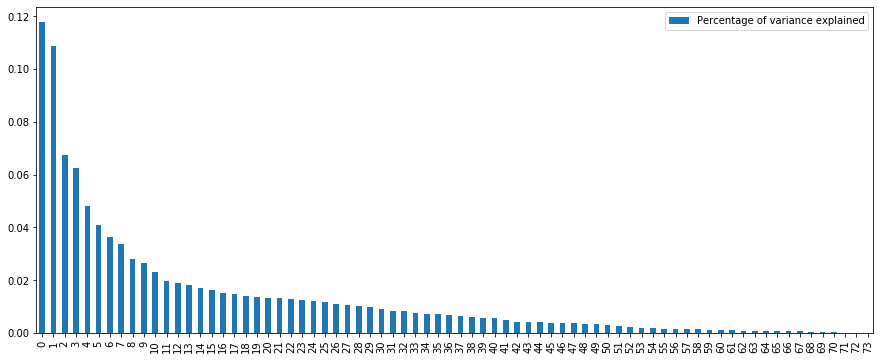

In [14]:
figura, ax1 = plt.subplots(1,  figsize = (15,6))
explained_variance_df.plot(ax=ax1, kind = 'bar')

In [15]:
# 13 elements

explained_variance_df.loc[0:12,].sum()

Percentage of variance explained    0.631561
dtype: float64

In [16]:
# 21 elements

explained_variance_df.loc[0:20,].sum()

Percentage of variance explained    0.753897
dtype: float64

According to the results we have obtained, finally we will decide to select 21 elements.

In [17]:
pca = PCA(n_components=21)
num_scaled_pca = pca.fit_transform(numericas)

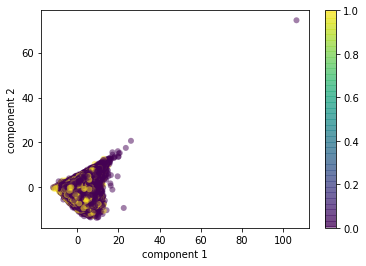

In [18]:
plt.scatter(num_scaled_pca[:, 0], num_scaled_pca[:, 1],
            c=loan.target, edgecolor='none', alpha=0.5)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [19]:
num_scaled_pca = pd.DataFrame(num_scaled_pca, columns = ['Component_1', 'Component_2', 'Component_3', 'Component_4',
                                                           'Component_5', 'Component_6', 'Component_7', 'Component_8',
                                                           'Component_9', 'Component_10', 'Component_11', 'Component_12',
                                                           'Component_13', 'Component_14', 'Component_15', 'Component_16',
                                                           'Component_17', 'Component_18', 'Component_19', 'Component_20',
                                                           'Component_21',])

In [20]:
num_scaled_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950000 entries, 0 to 949999
Data columns (total 21 columns):
Component_1     950000 non-null float64
Component_2     950000 non-null float64
Component_3     950000 non-null float64
Component_4     950000 non-null float64
Component_5     950000 non-null float64
Component_6     950000 non-null float64
Component_7     950000 non-null float64
Component_8     950000 non-null float64
Component_9     950000 non-null float64
Component_10    950000 non-null float64
Component_11    950000 non-null float64
Component_12    950000 non-null float64
Component_13    950000 non-null float64
Component_14    950000 non-null float64
Component_15    950000 non-null float64
Component_16    950000 non-null float64
Component_17    950000 non-null float64
Component_18    950000 non-null float64
Component_19    950000 non-null float64
Component_20    950000 non-null float64
Component_21    950000 non-null float64
dtypes: float64(21)
memory usage: 152.2 MB


In [21]:
loan_final = pd.concat([num_scaled_pca, categoricas], axis = 1)

In [22]:
loan_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950000 entries, 0 to 949999
Data columns (total 42 columns):
Component_1                            950000 non-null float64
Component_2                            950000 non-null float64
Component_3                            950000 non-null float64
Component_4                            950000 non-null float64
Component_5                            950000 non-null float64
Component_6                            950000 non-null float64
Component_7                            950000 non-null float64
Component_8                            950000 non-null float64
Component_9                            950000 non-null float64
Component_10                           950000 non-null float64
Component_11                           950000 non-null float64
Component_12                           950000 non-null float64
Component_13                           950000 non-null float64
Component_14                           950000 non-null float64
Compone

In [23]:
loan_final.to_csv('../data/PCA_set.csv', index = None, header=True)